In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#cross validation
from sklearn.model_selection import train_test_split

# Importar y limpiar el dataset


In [38]:
credit = pd.read_csv('Original.csv', header=1)

credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit.rename(columns={"default payment next month":"ISDEFAULT"}, inplace=True)
credit = credit.drop('ID', axis=1)

In [39]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ISDEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
#Examine the structure of your data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
ISDEFAULT    30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [41]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ISDEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
credit.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [43]:
#Cantidad de muestras
credit.shape

(30000, 24)

## Seleccionar la variable dependiente

In [44]:
#dependent variable
depVar = credit['ISDEFAULT']
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: ISDEFAULT, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


## Seleccionar las carateristicas

In [46]:
features = credit.iloc[:,:-1]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Recursive feature elimination

In [86]:
# Make a sataset copy to apply RFE
credit=credit.iloc[:,:-1]
creditRFE = credit.copy()
dtC= DecisionTreeClassifier(random_state=101)
rfecv=RFECV(estimator=dtC, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(creditRFE, depVar)
print('The number of optimal feaures found is: {}'.format(rfecv.n_features_))

The number of optimal feaures found is: 11


In [88]:
# Se elimina las caracteristicas que no son optimas
creditRFE.drop(creditRFE.columns[np.where(rfecv.support_==False)[0]],axis=1,inplace=True)
creditRFE.head()



,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3
0,20000,24,2,3913,3102,689,0,0,0,689,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,1000,1000
2,90000,34,0,29239,14027,13559,14331,14948,15549,1500,1000
3,50000,37,0,46990,48233,49291,28314,28959,29547,2019,1200
4,50000,57,-1,8617,5670,35835,20940,19146,19131,36681,10000


In [89]:
xTrainRFE, xTestRFE, yTrainRFE, yTestRFE = train_test_split(creditRFE, depVar)
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((22500, 11), (7500, 11), (22500,), (7500,))

In [90]:
creditRFE.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5.921163e+03,5225.68150
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,2.304087e+04,17606.96147
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.00000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,8.330000e+02,390.00000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2.009000e+03,1800.00000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5.000000e+03,4505.00000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.00000


In [91]:
creditRFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
LIMIT_BAL    30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
dtypes: category(1), int64(10)
memory usage: 2.3 MB


In [92]:
#Se muestra matriz de covarianza
print(creditRFE.cov())

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   

              BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6  \
LIMIT_BAL  2.548533e+09  2.453926e+09  2.331481e+09  2.243837e+09   
AGE        3.433425e+04  3.045311e+04  2.765407e+04  2.613765e+04   
BILL_AMT1  4.556511e+0

In [93]:
#Se muestra matris de correlacion
print(creditRFE.corr())

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   

           BILL_AMT5  BILL_AMT6  PAY_AMT2  PAY_AMT3  
LIMIT_BAL   0.295562   0.290389  0.178408  0.210167  
AGE         0.049345   0.047613  

# Cross Validation

In [65]:
#implement Cross Validation anytime we need to by simply 
#running the following on the X and Y training sets

xTrain, xTest, yTrain, yTest = train_test_split(features, depVar)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((22500, 23), (7500, 23), (22500,), (7500,))

# PCA

In [78]:
xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(credit, depVar)
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 21), (7500, 21), (22500,), (7500,))

In [82]:
standScaler= StandardScaler()
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=8) # 8 columns that represents ~75% variability
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

1.0

In [83]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 8), (7500, 8), (22500,), (7500,))

# Definicion de los modelos

In [ ]:
#Models

modelRF = RandomForestClassifier()
modelKN = KNeighborsClassifier()
modelDT = DecisionTreeClassifier()

#Reduced Feature Elimination Vars

modelRF_RFE = RandomForestClassifier()
modelDT_RFE = DecisionTreeClassifier()

#Principal Component Analysis Vars

modelRF_PCA = RandomForestClassifier()
modelDT_PCA = DecisionTreeClassifier()

In [98]:
#dependent variable
print(depVar)


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: ISDEFAULT, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


# Clasification Models

In [168]:
models = [
    ('RF', RandomForestClassifier()),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
]



In [170]:
print('Dataset Original')

for name, model in models:
        clf = model
        clf.fit(xTrain, yTrain)
        accuracT = clf.score(xTrain, yTrain)
        print( name, 'Ac. Train',accuracT )

Dataset Original


C:\Users\lucyl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Ac. Train 0.9804888888888889
NB Ac. Train 0.3798666666666667
KNN Ac. Train 0.8166666666666667
DT Ac. Train 0.9992888888888889


In [176]:
#Se crea la variable con el metodo con mas accuracy
DT=DecisionTreeClassifier()
DT.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [172]:
print('Dataset con RFE')

for name, model in models:
        clf = model
        clf.fit(xTrainRFE,yTrainRFE)
        accuracT = clf.score(xTrainRFE,yTrainRFE)
        print( name, 'Ac. Train',accuracT )

Dataset con RFE
RF Ac. Train 0.9783555555555555
NB Ac. Train 0.6340888888888889
KNN Ac. Train 0.8132444444444444
DT Ac. Train 0.9977777777777778


In [175]:
#Se crea la variable con el metodo con mas accuracy
DTRFE=DecisionTreeClassifier()
DTRFE.fit(xTrainRFE,yTrainRFE)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [177]:
print('Dataset con PCA')

for name, model in models:
        clf = model
        clf.fit(xTrainPCA,yTrainPCA)
        accuracT = clf.score(xTrainPCA,yTrainPCA)
        print( name, 'Ac. Train',accuracT)

Dataset con PCA
RF Ac. Train 0.9788888888888889
NB Ac. Train 0.8034666666666667
KNN Ac. Train 0.8374222222222222
DT Ac. Train 0.9994222222222222


In [196]:
DTPCA=DecisionTreeClassifier()
DTPCA.fit(xTrainPCA,yTrainPCA)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Modelo Final
Se escoge el modelo de decition Tree, con el dataset original

In [197]:
DT.score(xTrain,yTrain)

0.9992888888888889

# Realizando predicciones
## Arbol de desiciones

In [191]:
DTPred = DT.predict(xTest)
predRsquared = r2_score(yTest,DTPred)
rmse = sqrt(mean_squared_error(yTest, DTPred))
accuracy=accuracy_score(DTPred, yTest)
confusionMatrix=confusion_matrix(DTPred,yTest)
clasificationReport=classification_report(DTPred,yTest)
print('Desicion Tree')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Desicion Tree
R Squared: -0.623
RMSE: 0.525
Accuracy: 0.724
Confusion Matrix: [[4757  950]
 [1117  676]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.81      0.83      0.82      5707
           1       0.42      0.38      0.40      1793

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.72      0.72      0.72      7500



In [184]:
predDTRFE = DTRFE.predict(xTestRFE)
predRsquared = r2_score(yTestRFE,predDTRFE)
rmse = sqrt(mean_squared_error(yTestRFE, predDTRFE))
accuracy=accuracy_score(predDTRFE, yTestRFE)
confusionMatrix=confusion_matrix(predDTRFE,yTestRFE)
clasificationReport=classification_report(predDTRFE,yTestRFE)
print('Desicion Tree con RFE')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Desicion Tree con RFE
R Squared: -0.588
RMSE: 0.520
Accuracy: 0.729
Confusion Matrix: [[4814  977]
 [1052  657]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.82      0.83      0.83      5791
           1       0.40      0.38      0.39      1709

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500



In [199]:
predDTPCA = DTPCA.predict(xTestPCA)
predRsquared = r2_score(yTestRFE,predDTPCA)
rmse = sqrt(mean_squared_error(yTestPCA, predDTPCA))
accuracy=accuracy_score(predDTPCA, yTestPCA)
confusionMatrix=confusion_matrix(predDTPCA,yTestPCA)
clasificationReport=classification_report(predDTPCA,yTestPCA)
print('Desicion Tree con PCA')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Desicion Tree con PCA
R Squared: -1.244
RMSE: 0.615
Accuracy: 0.622
Confusion Matrix: [[4157 1129]
 [1705  509]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.71      0.79      0.75      5286
           1       0.31      0.23      0.26      2214

    accuracy                           0.62      7500
   macro avg       0.51      0.51      0.51      7500
weighted avg       0.59      0.62      0.60      7500



# Resultados
El resultado de accuracy es de 72%, con el desicion tree, a continuacion se grafican los resultados. 

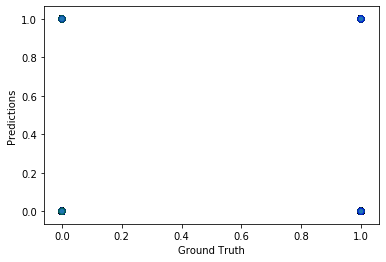

In [200]:
plt.scatter(yTest, DTPred, edgecolor=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();